In [8]:
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [79]:
filename = '2169715.csv'
date = []
data = []
with open(filename) as f:
    HEADER = np.array(f.readline())
    
    for line in f:
        
        dataline = f.readline()
        if dataline != '':
            dataline = dataline[:-1].replace('T',',').replace('-',',').replace(':',',').split(',')
            time = datetime.datetime(1,int(dataline[0]),int(dataline[1]),int(dataline[2]),int(dataline[3]))
            data.append(dataline)
            date.append(time)
            
    #DATA = np.loadtxt(f, delimiter=',', dtype=np.dtype(float))

print(data)
DATA = np.array(data, dtype = float)

[['01', '01', '02', '00', '00', '3.2', '24.3', '14', '26.2', '12.2', '41', '26.2', '19', '5', '499', '6', '109', '7.6', '119', '191', '4.8'], ['01', '01', '04', '00', '00', '2.1', '23.2', '13.5', '25.7', '12.2', '39.2', '25.7', '18.6', '5', '447', '6', '129', '7.6', '126', '194', '4.4'], ['01', '01', '06', '00', '00', '1.4', '23', '13.2', '25.5', '11.1', '39.2', '25.5', '18.3', '5', '461', '6', '153', '7.5', '120', '194', '4.8'], ['01', '01', '08', '00', '00', '1.4', '23.2', '13.4', '26.1', '11.1', '39.2', '26.1', '18.9', '5', '460', '6', '142', '7.6', '139', '191', '4.9'], ['01', '01', '10', '00', '00', '5', '24.8', '15.8', '34', '19.2', '48.9', '34', '28.3', '5', '306', '6', '247', '8.3', '118', '206', '4.1'], ['01', '01', '12', '00', '00', '5', '26.6', '16.1', '38.9', '21.2', '54', '38.9', '34.5', '5', '170', '6', '169', '8.4', '145', '234', '1.5'], ['01', '01', '14', '00', '00', '5', '26.6', '16.2', '40', '23', '55.4', '40', '35.6', '1', '152', '4', '143', '8.6', '164', '338', '0.9

ValueError: setting an array element with a sequence.

In [51]:
dataline = dataline[:-1].replace('T',',').replace('-',',').replace(':',',').split(',')

print(dataline)
time = datetime.datetime(1,int(dataline[0]),int(dataline[1]),int(dataline[2]),int(dataline[3]),int(dataline[4]))
print(time)

['01', '01', '01', '00', '00', '4.1', '24.8', '14.3', '26.3', '12.2', '39.9', '26.3', '19.1', '5', '478', '6', '117', '7.8', '113', '192', '4.6']
0001-01-01 01:00:00


In [4]:
print(HEADER)

DATE,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-DEWP-NORMAL,HLY-HIDX-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-TEMP-NORMAL,HLY-WCHL-NORMAL,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD



In [73]:
DATA

array([list(['01', '01', '02', '00', '00', '3.2', '24.3', '14', '26.2', '12.2', '41', '26.2', '19', '5', '499', '6', '109', '7.6', '119', '191', '4.8']),
       list(['01', '01', '04', '00', '00', '2.1', '23.2', '13.5', '25.7', '12.2', '39.2', '25.7', '18.6', '5', '447', '6', '129', '7.6', '126', '194', '4.4']),
       list(['01', '01', '06', '00', '00', '1.4', '23', '13.2', '25.5', '11.1', '39.2', '25.5', '18.3', '5', '461', '6', '153', '7.5', '120', '194', '4.8']),
       ...,
       list(['12', '31', '18', '00', '00', '4.1', '26.2', '15.7', '30.5', '15.8', '43', '30.5', '24.6', '5', '236', '4', '200', '7.1', '195', '167', '2.2']),
       list(['12', '31', '20', '00', '00', '5', '24.8', '15.4', '28.6', '14', '41', '28.6', '22.3', '5', '385', '4', '114', '7.4', '172', '191', '3.6']),
       list(['12', '31', '22', '00', '00', '4.1', '24.8', '14.9', '27.3', '12.2', '39.9', '27.3', '20.4', '5', '459', '6', '99', '7.7', '134', '188', '4.1'])],
      dtype=object)

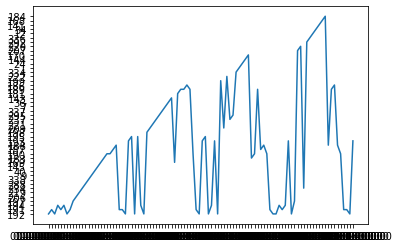

In [6]:
fig, ax = plt.subplots()
ax.plot(DATA[0:100,0],DATA[0:100,15])

